In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [2]:
plt.rcParams['figure.figsize'] = [3.6, 2.5]
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['legend.fancybox'] = False
plt.rcParams['legend.edgecolor'] = '0'

In [3]:
data = pd.read_excel('/mnt/e/東大/研究/20240429_spectrometer_calibration/20240501-Ne-calibration.xlsx')

In [4]:
data.head()

,dial,No.,wavlength1,wavelength2,px1,px2,linear dispersion,note,center wavelength,difference from dial,Reasonablity
0,359.8,0.0,359.35263,360.01694,370.0,540.0,0.003908,reasonable,359.907524,0.107524,reasonable
1,359.8,NaN,360.01694,360.91787,540.0,772.0,0.003883,reasonable,359.908207,0.108207,reasonable
2,369.0,1.0,368.22421,368.57351,269.0,359.0,0.003881,"observed 3, database 2…, reasonable",369.167320,0.167320,reasonable
3,427.0,2.0,426.80086,426.97223,305.0,351.0,0.003725,NaN,427.572025,NaN,NaN
4,427.0,NaN,426.97223,427.46617,351.0,477.0,0.003920,NaN,427.603376,NaN,NaN


In [5]:
data_re = data.dropna(subset = ['Reasonablity'])

# Linear dispersion
The reciprocal linear dispersion is given by

$$\left|\frac{d\lambda}{dx}\right| =\frac{1}{f}\left( \sqrt{\left(\frac{\cos\theta_0\cos\epsilon}{mg\cdot10^{-6}}\right)^2 - \left(\frac{\lambda}{2}\right)^2} + \frac{m}{|m|}\frac{\lambda}{2}\tan\theta_0 \right)$$

where $\theta_0$ is the incidental angle, $\epsilon$ is the fan angle, $f[mm]$ is the focal length, $g$[lines(L)/mm] is the grating number, $m$ is the diffraction order

In [6]:
def linear_dispersion(wavelength, theta0, m, g, f):
    return 1 / f * (np.sqrt((np.cos(theta0) / (m * g * 1e-6)) ** 2 - (wavelength/2) ** 2) + m / np.abs(m) * wavelength / 2 *  np.tan(theta0))

In [7]:
def linear_dispersion2(wavelength, theta0, m, f):
    return 1 / f * (np.sqrt((np.cos(theta0) / (m * 1200 * 1e-6)) ** 2 - (wavelength/2) ** 2) + m / np.abs(m) * wavelength / 2 *  np.tan(theta0))

In [8]:
wavelength = np.linspace(360, 705, 300)

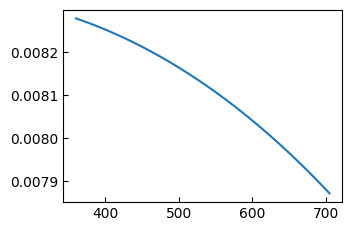

In [9]:
plt.plot(wavelength, linear_dispersion(wavelength, np.deg2rad(6), 1, 1200, 100000))

In [10]:
[theta2, m2, f2], _ = curve_fit(linear_dispersion2,
          data_re['center wavelength'], data_re['linear dispersion'],
          p0=[np.deg2rad(7), -1, 10000])

In [11]:
[theta, m, g, f], _ = curve_fit(linear_dispersion,
          data_re['center wavelength'], data_re['linear dispersion'],
          p0=[np.deg2rad(7), -1, 1200, 10000])

/home/jxluo/space/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


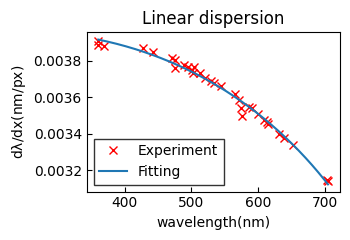

In [19]:
plt.plot(data_re['center wavelength'], data_re['linear dispersion'], 'rx', label='Experiment')
plt.ylabel('$d\lambda/dx(nm/px)$')
plt.xlabel('wavelength(nm)')
plt.title('Linear dispersion')

plt.plot(wavelength, linear_dispersion(wavelength, theta, m, g, f), label='Fitting')
# plt.plot(wavelength, linear_dispersion2(wavelength, theta2, m2,f2))

plt.legend()

plt.tight_layout()

plt.savefig('./linear dispersion.jpg', dpi=600)

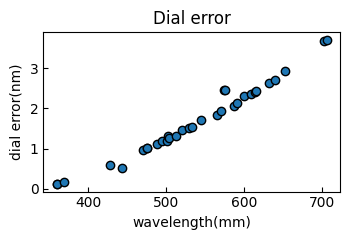

In [18]:
plt.plot(data_re['center wavelength'], data_re['difference from dial'], 'o', mec='k')
plt.xlabel('wavelength(mm)')
plt.ylabel('dial error(nm)')
plt.title('Dial error')

plt.tight_layout()

plt.savefig('./dial error.jpg', dpi=600)